# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](1_1.png)

###Import TenserFlow

In [3]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

#Task 2: The Dataset

###Import MNIST

In [4]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train)

11490434/11490434 [==============================] - 1s 0us/step


###Shapes of Imported Arrays



In [5]:
print('x_train shape : ',x_train.shape)
print('y_train shape : ',y_train.shape)
print('x_test shape : ',x_test.shape)
print('y_test shape : ',y_test.shape)

x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


###Plot an Image Example

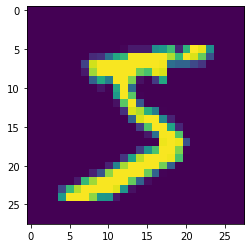

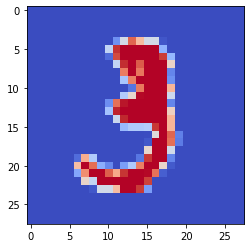

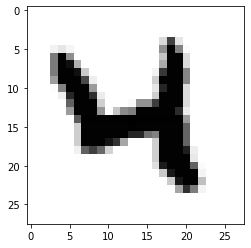

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[10],cmap='coolwarm')
plt.show()
plt.imshow(x_train[20],cmap='binary')
plt.show()

###Display Labels

In [7]:
y_train[20]

4

In [8]:
# x_train[20]
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

### Encoding Labels

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

###Validated Shapes

In [10]:
print('y_train_encoded shape: ',y_train_encoded.shape)
print('y_test_encoded shape: ',y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


###Display Encoded Labels

In [11]:
 y_train_encoded[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

#Task 5: Preprocessing the Examples

###Unrolling N-dimensional Arrays to Vectors

In [12]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

print('x_train_reshaped : ', x_train_reshaped.shape)
print('x_test_reshaped : ', x_test_reshaped.shape)

x_train_reshaped :  (60000, 784)
x_test_reshaped :  (10000, 784)


### Display Pixel Values

In [13]:
print(set(x_train_reshaped[10]))

{0, 1, 128, 6, 7, 8, 137, 138, 139, 11, 141, 140, 18, 146, 19, 24, 25, 28, 31, 34, 164, 36, 166, 165, 40, 41, 42, 171, 177, 50, 51, 180, 239, 57, 63, 66, 197, 70, 73, 206, 207, 209, 210, 81, 84, 213, 214, 215, 89, 90, 219, 91, 93, 222, 224, 103, 232, 104, 105, 236, 238, 110, 112, 240, 242, 241, 244, 116, 118, 247, 246, 117, 250, 253, 254}


### Data Normalization

In [14]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

# print(x_mean)
# print(x_std)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

### Display Normalized Pixel Values

In [15]:
print(set(x_train_norm[10]))

{-0.4240738943910262, 1.0778195735660674, 2.3633385588513764, 1.6887592893452241, -0.34770642991863165, 0.8869009123850808, 2.6560805059955555, 2.8088154349403447, 0.4159682148053143, 2.5288013985415647, 2.6051688630139593, 2.681536327486354, 1.7523988430722195, -0.19497150097384247, 2.719720059722551, 2.706992148977152, 0.75962180493109, 2.083324522452596, 2.4015222910875735, 0.4668798577869107, 0.09777044617033681, 1.4342010744372422, 0.7214380726948927, 0.11049835691573591, 0.00867507095254312, 0.505063590023108, 1.8287663075446141, 2.426978112578372, 2.7960875241949457, 2.7579037919587486, -0.10587612575604877, 1.2050986810200583, 1.8669500397808114, 0.89962882313048, -0.41134598364562713, 0.912356733875879, -0.029508661283654175, -0.18224359022844336, 0.2250495536243278, 0.2123216428789287, 0.6068868759863008, 2.210603629906587, 2.2487873621427843, 2.197875719161188, 2.2360594513973853, 2.579713041523161, 0.3014170180967224, -0.33497851917323257, 0.6450706082224981, 0.975996287602

#Task 6: Creating a Model

###Creating the Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128,activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](1_5.png)

### Compiling the Model

In [17]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [18]:
model.fit(x_train_norm, y_train_encoded, epochs=3)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3719 - accuracy: 0.8931
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1842 - accuracy: 0.9464
Epoch 3/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1393 - accuracy: 0.9593


### Evaluating the Model

In [19]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy: ',accuracy * 100)

313/313 [==============================] - 3s 11ms/step - loss: 0.1295 - accuracy: 0.9616
Test set accuracy:  96.16000056266785


# Task 8: Predictions

### Predictions on Test Set

In [22]:
preds = model.predict(x_test_norm)
print('Shape of preds: ', preds.shape)

313/313 [==============================] - 2s 7ms/step
Shape of preds:  (10000, 10)


### Print Predictions

In [46]:
np.argmax(preds[0])

7

### Plotting the Results

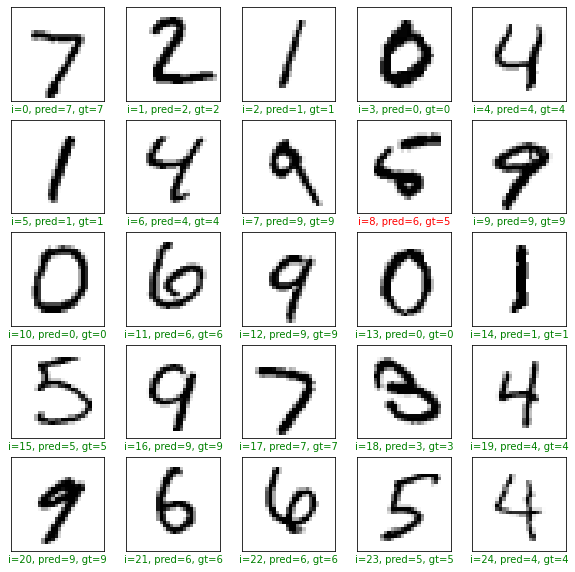

In [42]:
plt.figure(figsize=(10,10))

start_index = 0

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_index + i])
  gt = y_test[start_index + i]

  col = 'g'
  if pred != gt:
    col = 'r'

  plt.xlabel('i={}, pred={}, gt={}'.format(start_index + i, pred, gt), color=col)
  plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

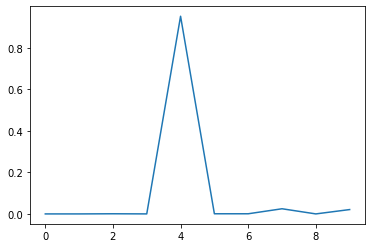

In [52]:
plt.plot(preds[24])
plt.show()